In [44]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

In [9]:
file = pd.read_excel('CKD.xlsx')

In [14]:
file.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wbcc,rbcc
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000,329.000000,294.000000,269.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437,38.884498,8406.122449,4.707435
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587,8.990105,2944.474190,1.025323
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000,32.000000,6500.000000,3.900000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000,40.000000,8000.000000,4.800000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000,45.000000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,8.000000


In [15]:
file['class'] = file['class'].map({'ckd':1,'notckd':0})
file['htn'] = file['htn'].map({'yes':1,'no':0})
file['dm'] = file['dm'].map({'yes':1,'no':0})
file['cad'] = file['cad'].map({'yes':1,'no':0})
file['appet'] = file['appet'].map({'good':1,'poor':0})
file['ane'] = file['ane'].map({'yes':1,'no':0})
file['pe'] = file['pe'].map({'yes':1,'no':0})
file['ba'] = file['ba'].map({'present':1,'notpresent':0})
file['pcc'] = file['pcc'].map({'present':1,'notpresent':0})
file['pc'] = file['pc'].map({'abnormal':1,'normal':0})
file['rbc'] = file['rbc'].map({'abnormal':1,'normal':0})

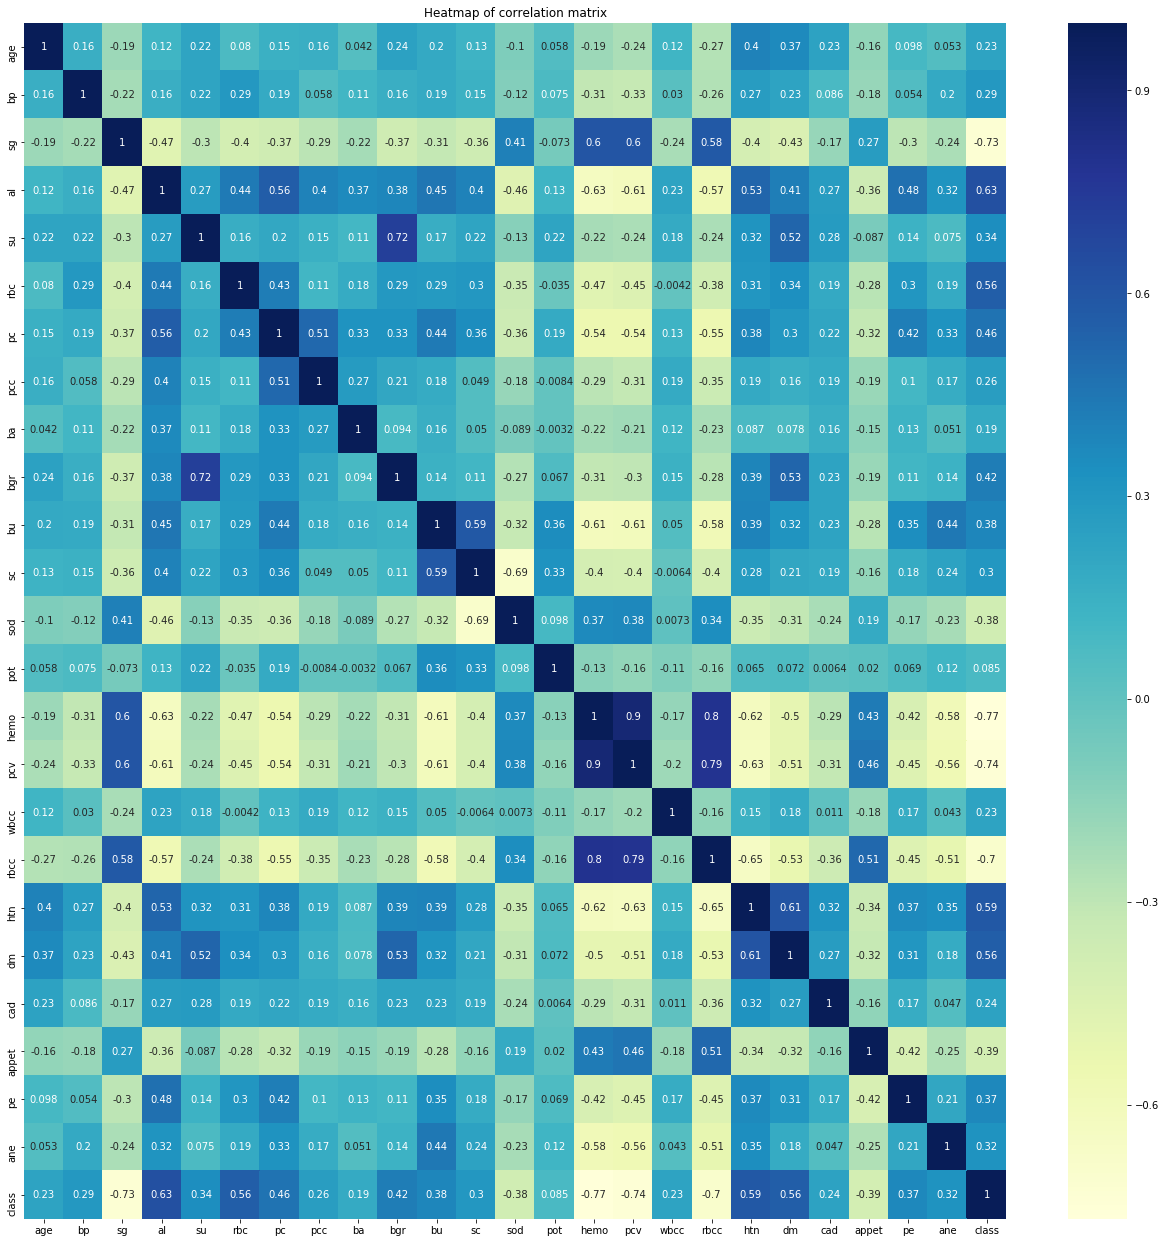

In [21]:
plt.figure(figsize = (22,22))
plt.title("Heatmap of correlation matrix")
sn.heatmap(file.corr(), annot = True, cmap = 'YlGnBu') 

In [23]:
file.isnull().sum()

age        9
bp        12
sg        47
al        46
su        49
rbc      152
pc        65
pcc        4
ba         4
bgr       44
bu        19
sc        17
sod       87
pot       88
hemo      52
pcv       71
wbcc     106
rbcc     131
htn        2
dm         2
cad        2
appet      1
pe         1
ane        1
class      0
dtype: int64

In [24]:
file.dropna(inplace=True)

In [25]:
file.shape

(158, 25)

In [30]:
LR=LogisticRegression()

In [34]:
a = file.iloc[:,:-1]
b = file['class']

In [39]:
a_train, a_test, b_train, b_test = train_test_split(a,b, random_state=2, shuffle = True, test_size=0.2)

In [40]:
LR.fit(a_train, b_train)

C:\Users\bibek\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [47]:
testing_predict = LR.predict(a_test)
training_predict = LR.predict(a_train)

In [48]:
print('Training set Accuracy: ', accuracy_score(b_train, training_predict))
print('Test set Accuracy: ', accuracy_score(b_test, testing_predict))

Training set Accuracy:  1.0
Test set Accuracy:  0.96875


In [49]:
trng, flps, flng, trps = confusion_matrix(b_test, testing_predict)

print(f'True Neg: {tn}')
print(f'False Pos: {fp}')
print(f'False Neg: {fn}')
print(f'True Pos: {tp}')

ValueError: not enough values to unpack (expected 4, got 2)

In [51]:
confusion_matrix(b_test, testing_predict)

array([[20,  0],
       [ 1, 11]], dtype=int64)